
1️⃣ Store a New Record
2️⃣ Update a Record
3️⃣ Check Criminal Face
4️⃣ Generate Graphs
5️⃣ Exit

--- Criminal Face Check ---
🚨 Match Found! This person is in the criminal database. (ID: 1, Name: Chandler)

1️⃣ Store a New Record
2️⃣ Update a Record
3️⃣ Check Criminal Face
4️⃣ Generate Graphs
5️⃣ Exit

📊 Generating graphs...


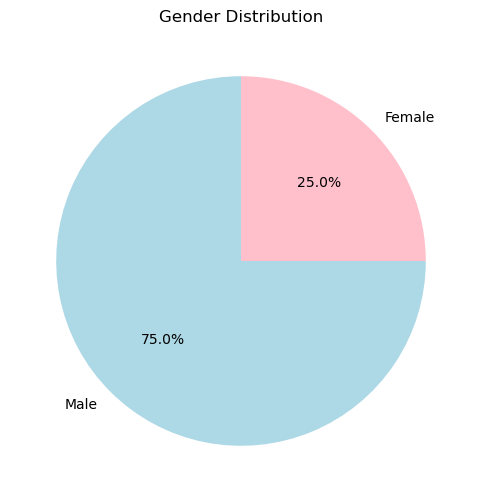

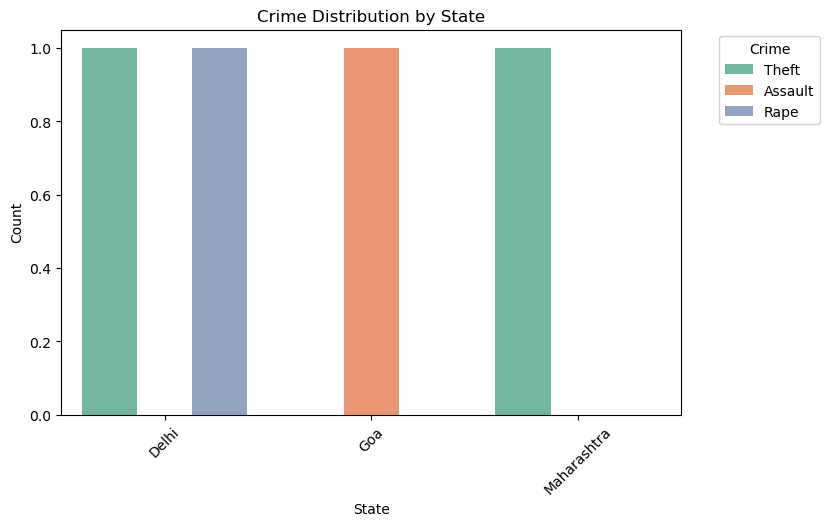

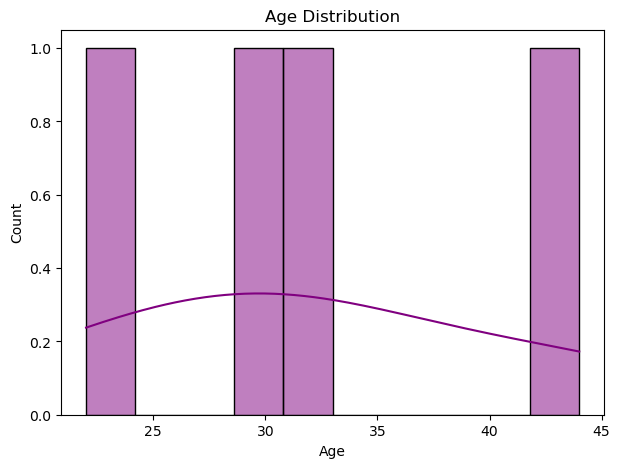

✅ Graphs displayed successfully!

1️⃣ Store a New Record
2️⃣ Update a Record
3️⃣ Check Criminal Face
4️⃣ Generate Graphs
5️⃣ Exit
👋 Exiting...


In [20]:
import csv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from deepface import DeepFace

# CSV Files
data_csv = "data.csv"
guilty_csv = "guilty.csv"
not_guilty_csv = "notguilty.csv"

# Function to check if ID is unique
def is_unique_id(user_id):
    if not os.path.exists(data_csv):
        return True  
    df = pd.read_csv(data_csv)
    return str(user_id) not in df["ID"].astype(str).values

# Function to extract face embeddings using DeepFace
def get_face_embedding(image_path):
    try:
        embedding = DeepFace.represent(img_path=image_path, model_name="Facenet512")[0]['embedding']
        return embedding  # 512-D vector
    except Exception as e:
        print(f"❌ Error extracting embedding: {e}")
        return None

# Function to store a new record
def store_record():
    print("\n--- Store a New Record ---")
    
    while True:
        record_id = input("Enter a Unique ID: ")
        if is_unique_id(record_id):
            break
        print("❌ ID already exists! Please enter a different ID.")

    name = input("Enter Name: ")
    gender = input("Enter Gender (Male/Female): ").strip().capitalize()
    age = input("Enter Age: ")
    state = input("Enter State: ")
    crime = input("Enter Crime: ")
    height = input("Enter Height (in cm): ")
    weight = input("Enter Weight (in kg): ")
    image_path = input("Enter Image Path: ")

    embedding = get_face_embedding(image_path)
    if embedding is None:
        print("❌ Embedding not created! Record not saved.")
        return
    
    embedding_str = ",".join(map(str, embedding))  # Convert array to string

    file_exists = os.path.exists(data_csv)
    
    with open(data_csv, mode="a", newline="") as file:
        writer = csv.writer(file)
        if not file_exists:
            writer.writerow(["ID", "Name", "Gender", "Age", "State", "Crime", "Height", "Weight", "Face_Embedding"])
        writer.writerow([record_id, name, gender, age, state, crime, height, weight, embedding_str])

    print(f"✅ Record added successfully! ID: {record_id}")

# Function to update a record (move to guilty.csv or notguilty.csv)
def update_record():
    print("\n--- Update a Record ---")
    if not os.path.exists(data_csv) or os.stat(data_csv).st_size == 0:
        print("❌ No records found!")
        return

    df = pd.read_csv(data_csv)
    record_id = input("Enter the ID to update: ")

    if str(record_id) not in df["ID"].astype(str).values:
        print("❌ ID not found!")
        return

    is_accused = input("Is this person guilty? (yes/no): ").strip().lower()
    
    if is_accused not in ["yes", "no"]:
        print("❌ Invalid input! Please enter 'yes' or 'no'.")
        return

    # Find the record to move
    record = df[df["ID"].astype(str) == str(record_id)]
    df = df[df["ID"].astype(str) != str(record_id)]  # Remove from data.csv

    # Save the updated data.csv (remove the accused person's record)
    df.to_csv(data_csv, index=False)

    # Move the record to guilty.csv or notguilty.csv
    target_csv = guilty_csv if is_accused == "yes" else not_guilty_csv
    file_exists = os.path.exists(target_csv)

    record.to_csv(target_csv, mode="a", header=not file_exists, index=False)

    print(f"✅ Record updated and moved to {'guilty.csv' if is_accused == 'yes' else 'notguilty.csv'}.")

# Function to check if a given image matches any criminal in guilty.csv
def check_criminal():
    print("\n--- Criminal Face Check ---")

    if not os.path.exists(guilty_csv) or os.stat(guilty_csv).st_size == 0:
        print("❌ No criminal records found!")
        return

    image_path = input("Enter the image path to check: ")
    input_embedding = get_face_embedding(image_path)

    if input_embedding is None:
        print("❌ Could not extract features from the image!")
        return

    df = pd.read_csv(guilty_csv)

    for index, row in df.iterrows():
        stored_embedding = np.array([float(x) for x in row["Face_Embedding"].split(",")])  # Convert string to numpy array
        similarity = np.dot(input_embedding, stored_embedding) / (np.linalg.norm(input_embedding) * np.linalg.norm(stored_embedding))  # Cosine similarity

        if similarity > 0.5:  # Adjust threshold as needed
            print(f"🚨 Match Found! This person is in the criminal database. (ID: {row['ID']}, Name: {row['Name']})")
            return

    print("✅ No match found. This person is NOT in the criminal database.")

# Function to generate visualizations
def generate_graphs():
    print("\n📊 Generating graphs...")

    if not os.path.exists(guilty_csv) or os.stat(guilty_csv).st_size == 0:
        print("❌ No data available for graphs.")
        return

    df = pd.read_csv(guilty_csv)

    # 1️⃣ Pie Chart for Male vs. Female Distribution
    plt.figure(figsize=(6, 6))
    df["Gender"].value_counts().plot.pie(autopct="%1.1f%%", colors=["lightblue", "pink"], startangle=90)
    plt.title("Gender Distribution")
    plt.ylabel("")  # Hide the y-label
    plt.show()

    # 2️⃣ Bar Graph for Area (State) vs. Crime
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x="State", hue="Crime", palette="Set2")
    plt.xticks(rotation=45)
    plt.title("Crime Distribution by State")
    plt.xlabel("State")
    plt.ylabel("Count")
    plt.legend(title="Crime", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.show()

    # 3️⃣ Histogram for Age Distribution
    plt.figure(figsize=(7, 5))
    sns.histplot(df["Age"].astype(float), bins=10, kde=True, color="purple")
    plt.title("Age Distribution")
    plt.xlabel("Age")
    plt.ylabel("Count")
    plt.show()

    print("✅ Graphs displayed successfully!")

# Main menu
while True:
    print("\n1️⃣ Store a New Record")
    print("2️⃣ Update a Record")
    print("3️⃣ Check Criminal Face")
    print("4️⃣ Generate Graphs")
    print("5️⃣ Exit")
    choice = input("Choose an option (1/2/3/4/5): ").strip()

    if choice == "1":
        store_record()
    elif choice == "2":
        update_record()
    elif choice == "3":
        check_criminal()
    elif choice == "4":
        generate_graphs()
    elif choice == "5":
        print("👋 Exiting...")
        break
    else:
        print("❌ Invalid choice! Please enter 1, 2, 3, 4, or 5.")




1️⃣ Store a New Record
2️⃣ Update a Record
3️⃣ Check Criminal Face
4️⃣ Exit

--- Store a New Record ---


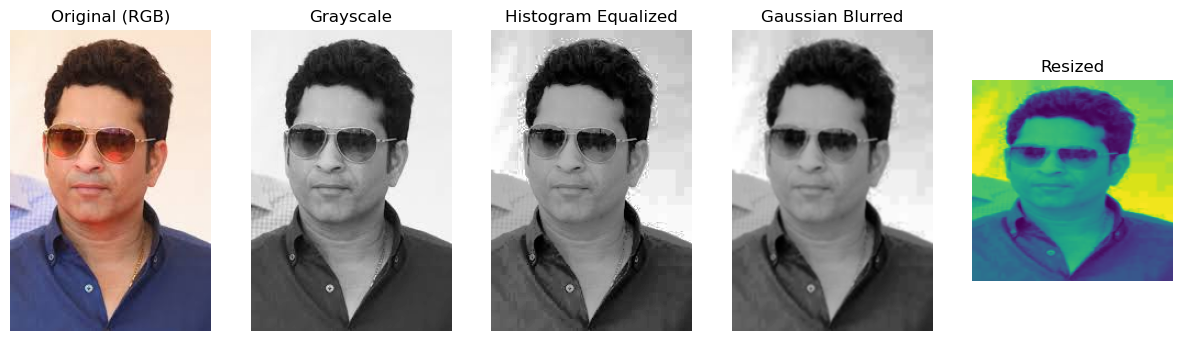

PermissionError: [Errno 13] Permission denied: 'data.csv'

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import csv
from deepface import DeepFace

# CSV Files
data_csv = "data.csv"
guilty_csv = "guilty.csv"
not_guilty_csv = "notguilty.csv"

def preprocess_image(image_path):
    """Preprocesses the image and returns the processed version."""
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    img_equalized = cv2.equalizeHist(img_gray)  # Histogram equalization
    img_blurred = cv2.GaussianBlur(img_equalized, (3, 3), 0)  # Gaussian blur
    img_resized = cv2.resize(img_blurred, (160, 160))  # Resize to 160x160 (DeepFace input size)
    img_normalized = img_resized / 255.0  # Normalize pixel values
    
    return img_normalized, [img_rgb, img_gray, img_equalized, img_blurred, img_resized]

def get_face_embedding(image_path):
    """Extracts face embeddings using DeepFace after preprocessing the image."""
    try:
        processed_img, steps = preprocess_image(image_path)
        
        # Display subplots of preprocessing steps
        titles = ["Original (RGB)", "Grayscale", "Histogram Equalized", "Gaussian Blurred", "Resized"]
        plt.figure(figsize=(15, 5))
        for i in range(5):
            plt.subplot(1, 5, i + 1)
            cmap = 'gray' if i in [1, 2, 3] else None  # Use grayscale colormap for grayscale images
            plt.imshow(steps[i], cmap=cmap)
            plt.title(titles[i])
            plt.axis("off")
        plt.show()
        
        # Extract face embedding
        embedding = DeepFace.represent(img_path=image_path, model_name="Facenet512")[0]['embedding']
        return embedding  # 512-D vector
    except Exception as e:
        print(f"❌ Error extracting embedding: {e}")
        return None

def is_unique_id(user_id):
    if not os.path.exists(data_csv):
        return True  
    df = pd.read_csv(data_csv)
    return str(user_id) not in df["ID"].astype(str).values

def store_record():
    print("\n--- Store a New Record ---")
    
    while True:
        record_id = input("Enter a Unique ID: ")
        if is_unique_id(record_id):
            break
        print("❌ ID already exists! Please enter a different ID.")

    name = input("Enter Name: ")
    gender = input("Enter Gender (Male/Female): ").strip().capitalize()
    age = input("Enter Age: ")
    state = input("Enter State: ")
    crime = input("Enter Crime: ")
    height = input("Enter Height (in cm): ")
    weight = input("Enter Weight (in kg): ")
    image_path = input("Enter Image Path: ")

    embedding = get_face_embedding(image_path)
    if embedding is None:
        print("❌ Embedding not created! Record not saved.")
        return
    
    embedding_str = ",".join(map(str, embedding))  # Convert array to string

    file_exists = os.path.exists(data_csv)
    
    with open(data_csv, mode="a", newline="") as file:
        writer = csv.writer(file)
        if not file_exists:
            writer.writerow(["ID", "Name", "Gender", "Age", "State", "Crime", "Height", "Weight", "Face_Embedding"])
        writer.writerow([record_id, name, gender, age, state, crime, height, weight, embedding_str])

    print(f"✅ Record added successfully! ID: {record_id}")

def update_record():
    print("\n--- Update a Record ---")
    if not os.path.exists(data_csv) or os.stat(data_csv).st_size == 0:
        print("❌ No records found!")
        return

    df = pd.read_csv(data_csv)
    record_id = input("Enter the ID to update: ")

    if str(record_id) not in df["ID"].astype(str).values:
        print("❌ ID not found!")
        return

    is_accused = input("Is this person guilty? (yes/no): ").strip().lower()
    
    if is_accused not in ["yes", "no"]:
        print("❌ Invalid input! Please enter 'yes' or 'no'.")
        return

    record = df[df["ID"].astype(str) == str(record_id)]
    df = df[df["ID"].astype(str) != str(record_id)]  # Remove from data.csv

    df.to_csv(data_csv, index=False)
    target_csv = guilty_csv if is_accused == "yes" else not_guilty_csv
    file_exists = os.path.exists(target_csv)

    record.to_csv(target_csv, mode="a", header=not file_exists, index=False)
    print(f"✅ Record updated and moved to {'guilty.csv' if is_accused == 'yes' else 'notguilty.csv'}.")

def check_criminal():
    print("\n--- Criminal Face Check ---")
    if not os.path.exists(guilty_csv) or os.stat(guilty_csv).st_size == 0:
        print("❌ No criminal records found!")
        return

    image_path = input("Enter the image path to check: ")
    input_embedding = get_face_embedding(image_path)

    if input_embedding is None:
        print("❌ Could not extract features from the image!")
        return

    df = pd.read_csv(guilty_csv)
    for _, row in df.iterrows():
        stored_embedding = np.array([float(x) for x in row["Face_Embedding"].split(",")])
        similarity = np.dot(input_embedding, stored_embedding) / (np.linalg.norm(input_embedding) * np.linalg.norm(stored_embedding))
        if similarity > 0.5:
            print(f"🚨 Match Found! (ID: {row['ID']}, Name: {row['Name']})")
            return
    print("✅ No match found.")

while True:
    print("\n1️⃣ Store a New Record")
    print("2️⃣ Update a Record")
    print("3️⃣ Check Criminal Face")
    print("4️⃣ Exit")
    choice = input("Choose an option (1/2/3/4): ").strip()
    if choice == "1":
        store_record()
    elif choice == "2":
        update_record()
    elif choice == "3":
        check_criminal()
    elif choice == "4":
        print("👋 Exiting...")
        break
    else:
        print("❌ Invalid choice!")
